In [2]:
import pandas as pd
import os
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import bokeh
import os
import openai
from openai import OpenAI
import backoff
import numpy as np
from sklearn.cluster import KMeans
from bokeh.plotting import figure, show, ColumnDataSource, output_file, save
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from bokeh.models import HoverTool
from bokeh.palettes import Category20
import json
import plotly.express as px
import plotly.graph_objects as go
import itertools
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pickle
import json

In [3]:
# Load embeddings file

# input the path to your saved embeddings
path_gpt = '/Users/ellenbowen/Desktop/Michigan/Siwo_lab/DeepPhenoNet/Embedding_code/'
file_gpt = str(path_gpt) + 'category_avg_embeddings_voyage.pkl'

df = pd.read_pickle(file_gpt)


In [4]:
df

,category,avg_embedding
0,circulatory system,"[-0.028507350180514677, 0.04207920810467629, 0..."
1,congenital anomalies,"[-0.03497670564268317, 0.049969138976718695, 0..."
2,dermatologic,"[-0.022318173397555558, 0.03274021857941989, -..."
3,digestive,"[-0.025511671967119967, 0.03402758464890431, 0..."
4,endocrine/metabolic,"[-0.019962324680431232, 0.03761807956991817, 0..."
5,genitourinary,"[-0.023486343149894052, 0.043826326365981785, ..."
6,hematopoietic,"[-0.017173042290866556, 0.04116505543671308, 0..."
7,infectious diseases,"[-0.018884734264946124, 0.034580584399510124, ..."
8,injuries & poisonings,"[-0.02828181048244005, 0.04367928329156712, 0...."
9,mental disorders,"[-0.03233835787365311, 0.03820363645392813, 0...."


In [5]:
# Ensure df is the cleaned version without NaN in 'category'
df_cleaned = df.dropna(subset=['category'])
unique_categories = df_cleaned['category'].unique()
categories = unique_categories

# Run t-SNE

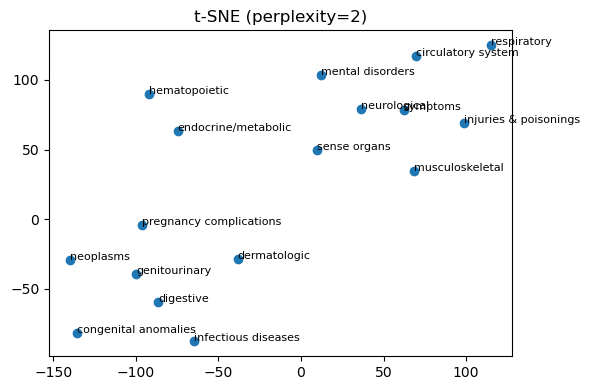

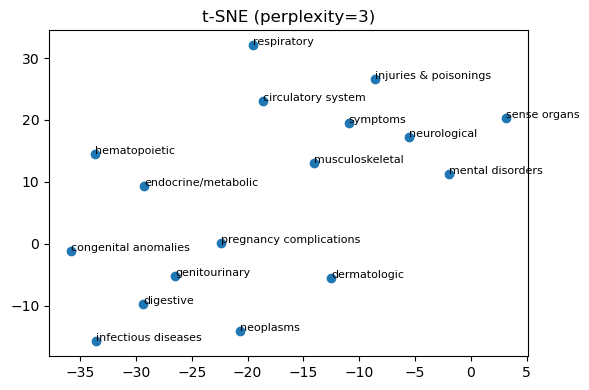

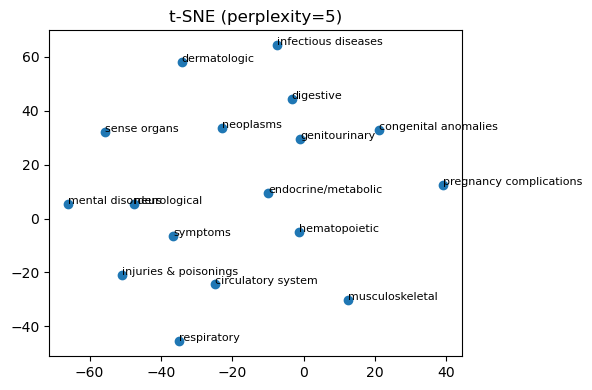

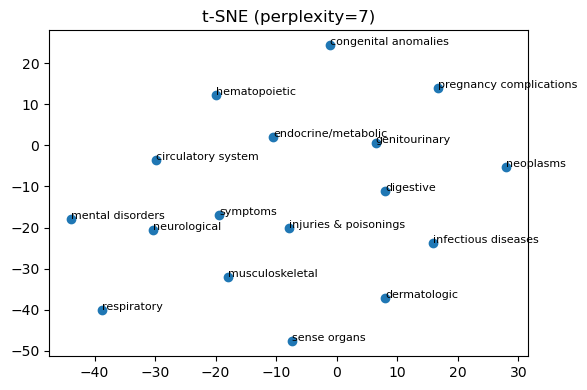

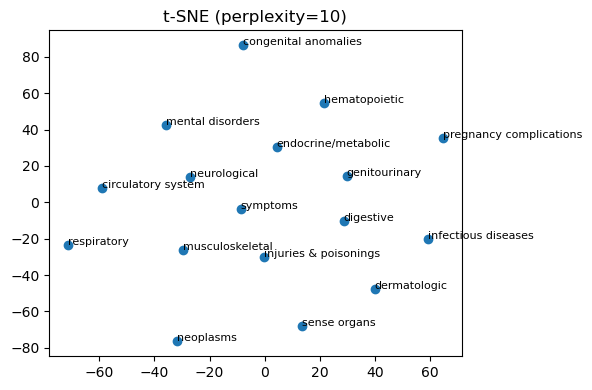

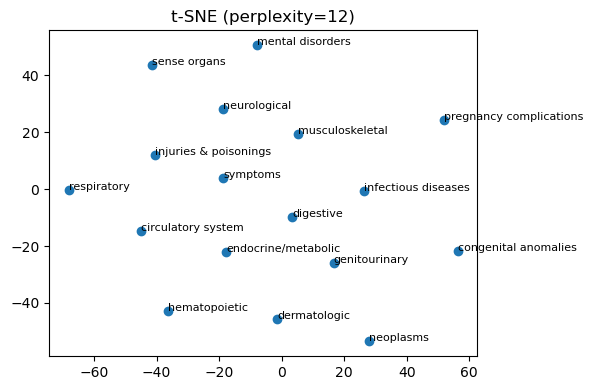

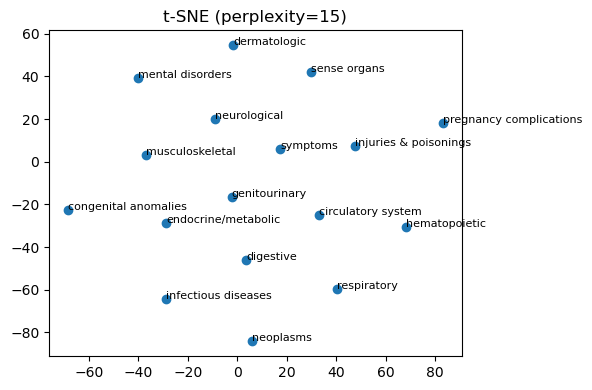

In [6]:
'''
Tune perplexity
'''

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

embeddings = np.vstack(df['avg_embedding'].values)

for perp in [2, 3, 5, 7, 10, 12, 15]:
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
    tsne_results = tsne.fit_transform(embeddings)

    plt.figure(figsize=(6, 4))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    for i, txt in enumerate(df['category']):
        plt.annotate(txt, (tsne_results[i, 0], tsne_results[i, 1]), fontsize=8)
    plt.title(f"t-SNE (perplexity={perp})")
    plt.tight_layout()
    plt.show()


# Run UMAP

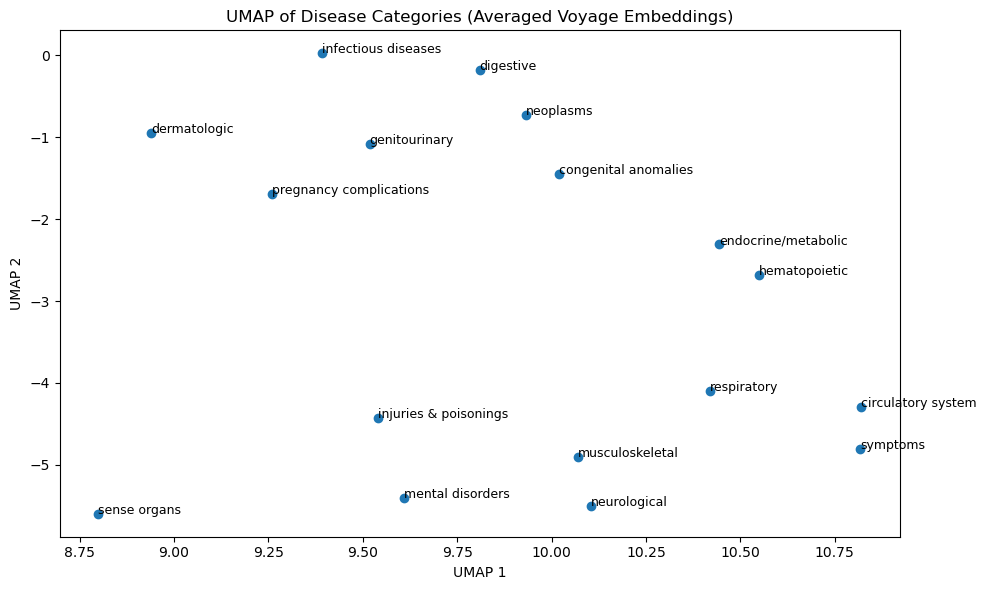

In [7]:
import umap

# Assuming df['avg_embedding'] contains list/array embeddings
X = np.vstack(df['avg_embedding'].values)

# Fit UMAP
reducer = umap.UMAP(n_neighbors=3, min_dist=0.1, metric='cosine', random_state=42)
embedding = reducer.fit_transform(X)

# Add to dataframe
df['umap_1'] = embedding[:, 0]
df['umap_2'] = embedding[:, 1]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['umap_1'], df['umap_2'])

for i, label in enumerate(df['category']):
    plt.annotate(label, (df['umap_1'][i], df['umap_2'][i]), fontsize=9)

plt.title("UMAP of Disease Categories (Averaged Voyage Embeddings)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.tight_layout()
plt.show()
